# My Profile

> LinkedIn: https://www.linkedin.com/in/vijay-purushothaman-0b23b4197/
\
> Github:  https://github.com/Vijaypurushoth988373
\
> Mail: vijaypurushothaman988373@gmail.com


# **My Approach**

# **Computer Vision Assignment**

### **Objective 1**: Count the number of rice grains in the Image.

### **Objective 2**: Find the number of broken grains in the image.

# Details about the Image
* The background will always be blue.
* There will be a mix of broken and non-broken rice grains.
* The grains will not overlap but can touch each other.

## 1. Importing the Libraries
 

*   **OpenCv**: **OpenCv** is an open-source library that is useful for computer vision applications such as image processing, video processing, facial recognition, and detection, etc.
*   **Numpy**: **Numpy** is a python package for scientific computing. It is a popular math library for Machine Learning. The main Object of Numpy is a multidimensional array.
*   **Matplotlib**: **Matplotlib** is a Python library used for data visualization and graphical plotting of the data.
*  **Showing CV2 Images** : The cv2.imshow() and cv.imshow() functions from the opencv-python package are incompatible with Jupyter notebook; see https://github.com/jupyter/notebook/issues/3935.

*  **ndimage** : The SciPy ndimage submodule is dedicated to image processing. Here, ndimage means an n-dimensional image.

*  **Watershed** : Watershed algorithm is a classic algorithm used for segmentation and is especially useful when extracting touching or overlapping objects in images, such as the coins in the figure above.

In [84]:
# Import libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from scipy import ndimage
from skimage.segmentation import watershed
from skimage import filters, feature, measure, color

## 2. Image Preprocessing

*  We will read the image by using “OpenCV Library” & then convert this image into grayscale image.

In [85]:
def image_show(image, x=30, y=7):
  img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  plt.figure(figsize=(x,y))
  plt.imshow(img)

*  Reading the image from the Directory 

In [86]:
img=cv.imread("/content/image_5.jpg")

*  Displaying the image using function

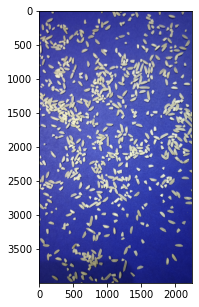

In [87]:
image_show(img,25,5)

*  We have to convert the image from RGB to Grayscale

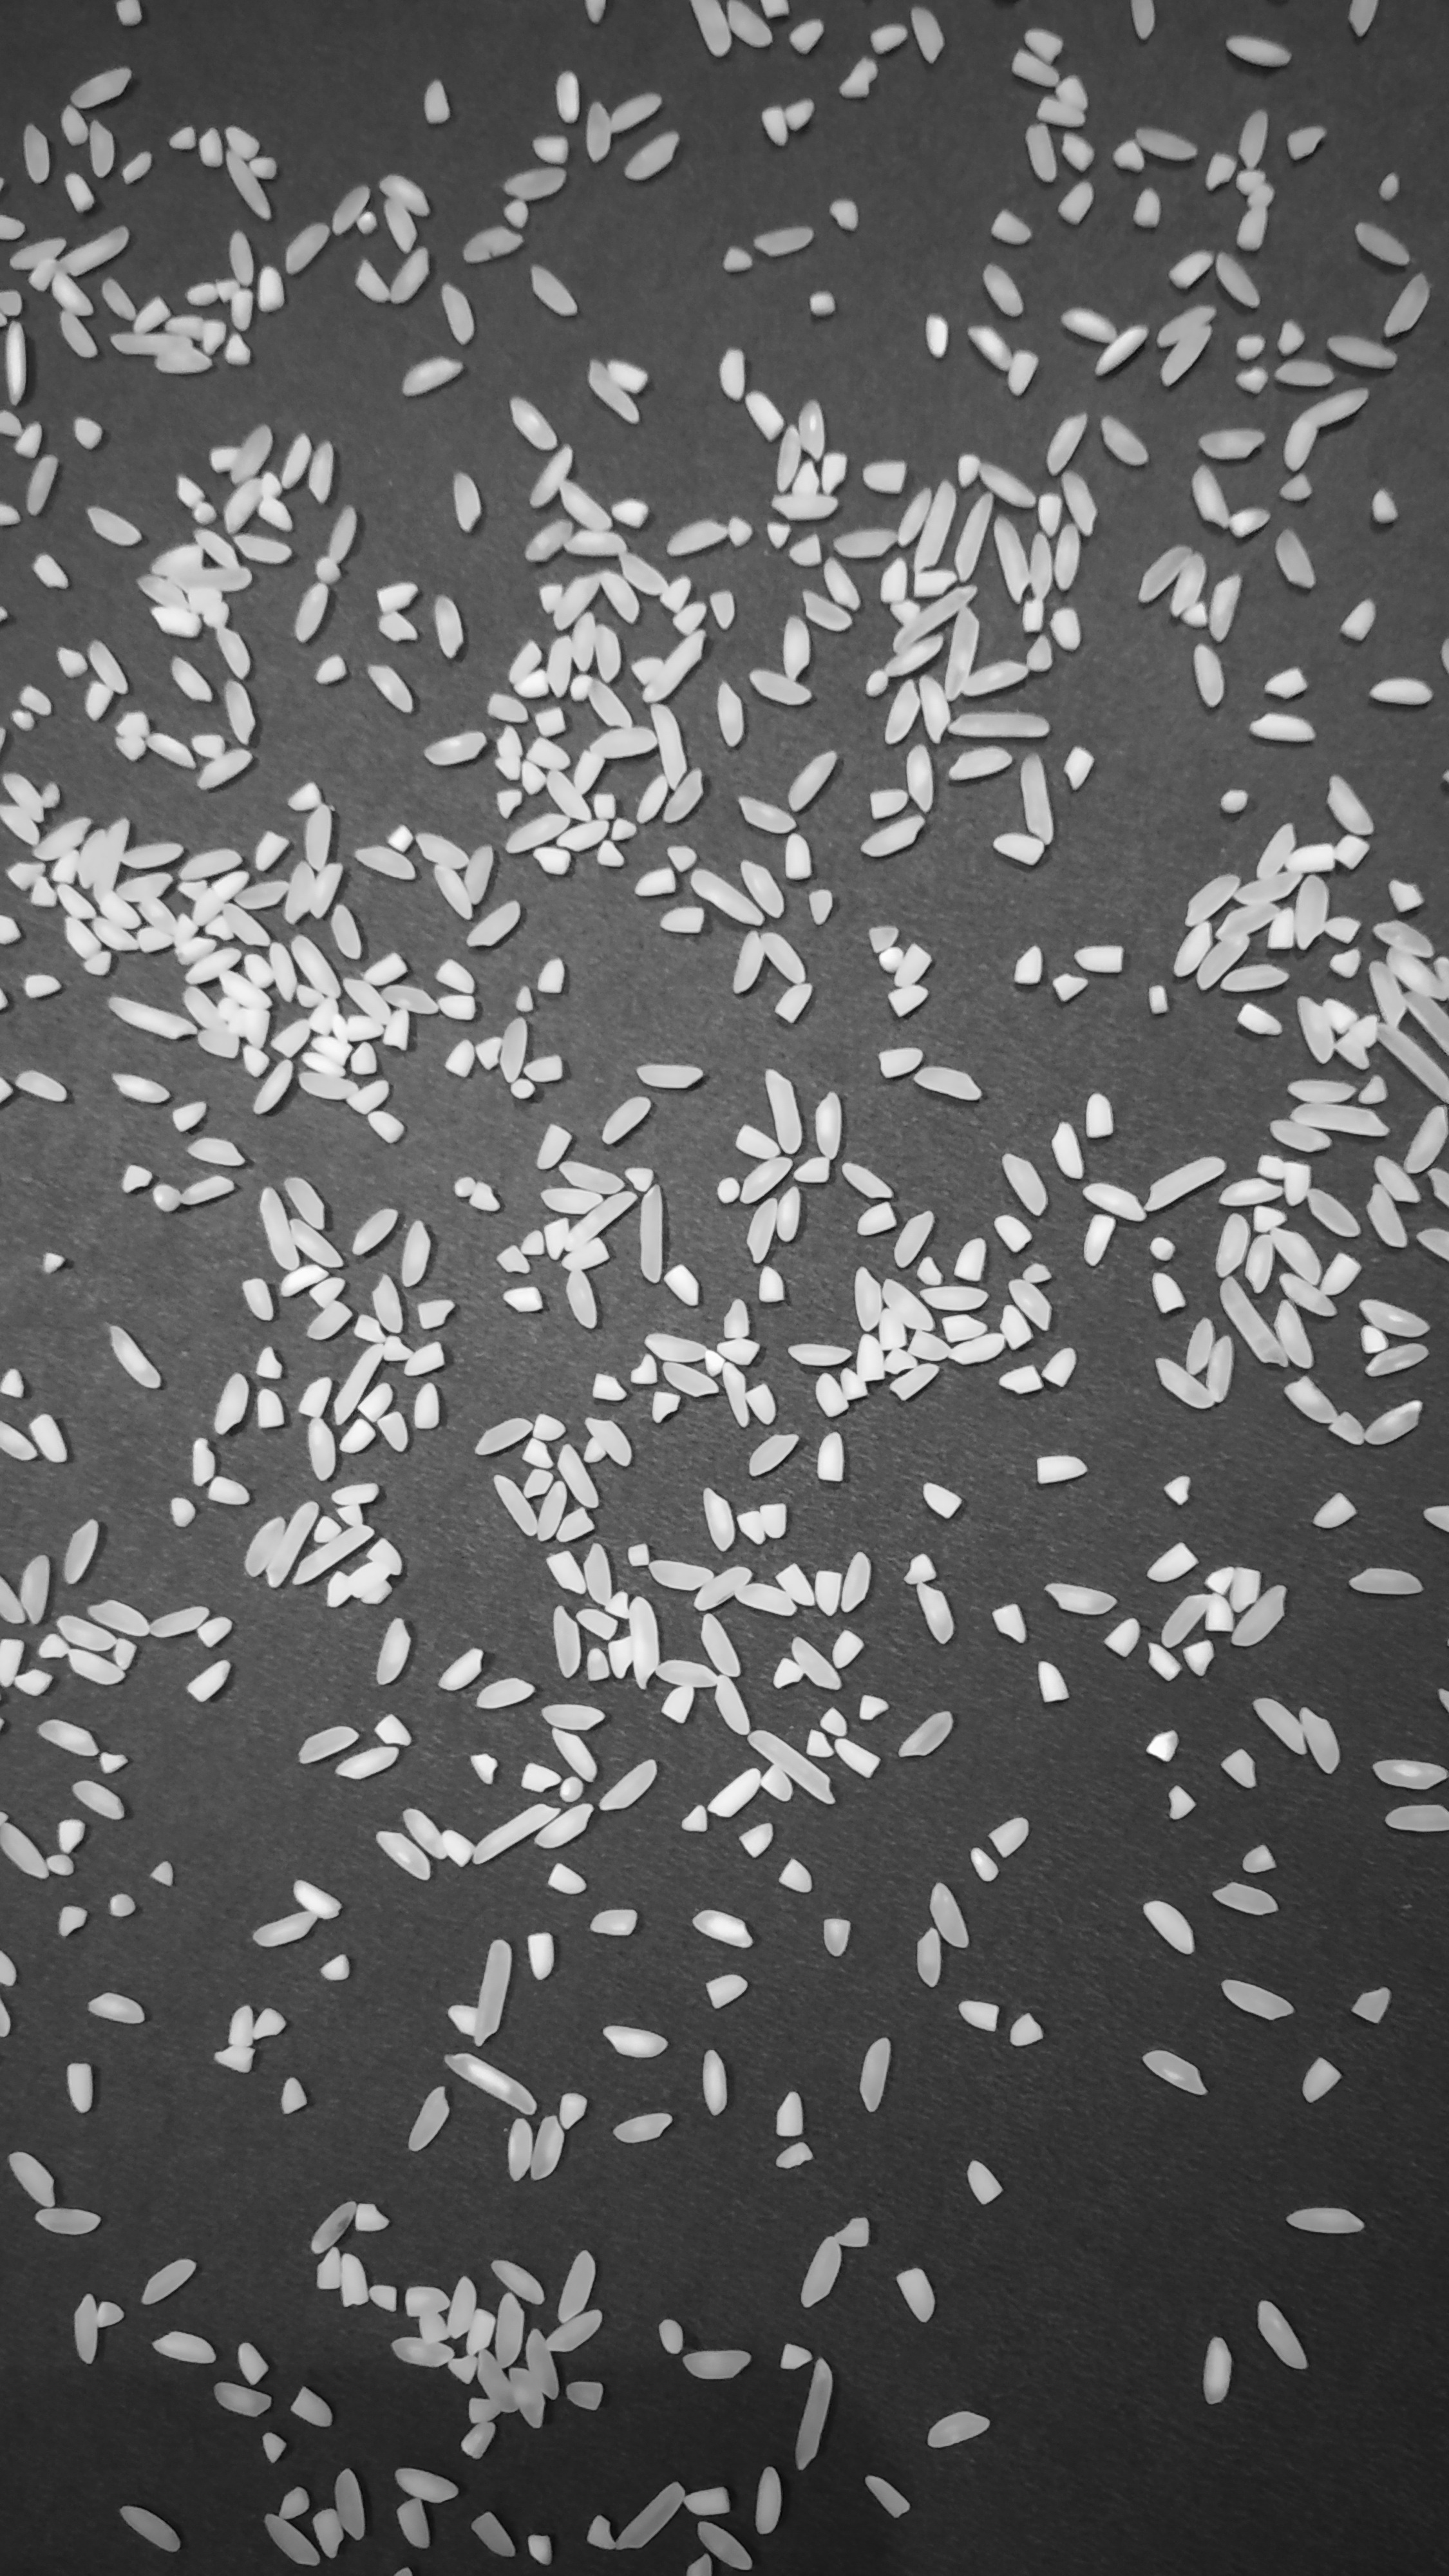

In [88]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

*   Image Thresholding using contours

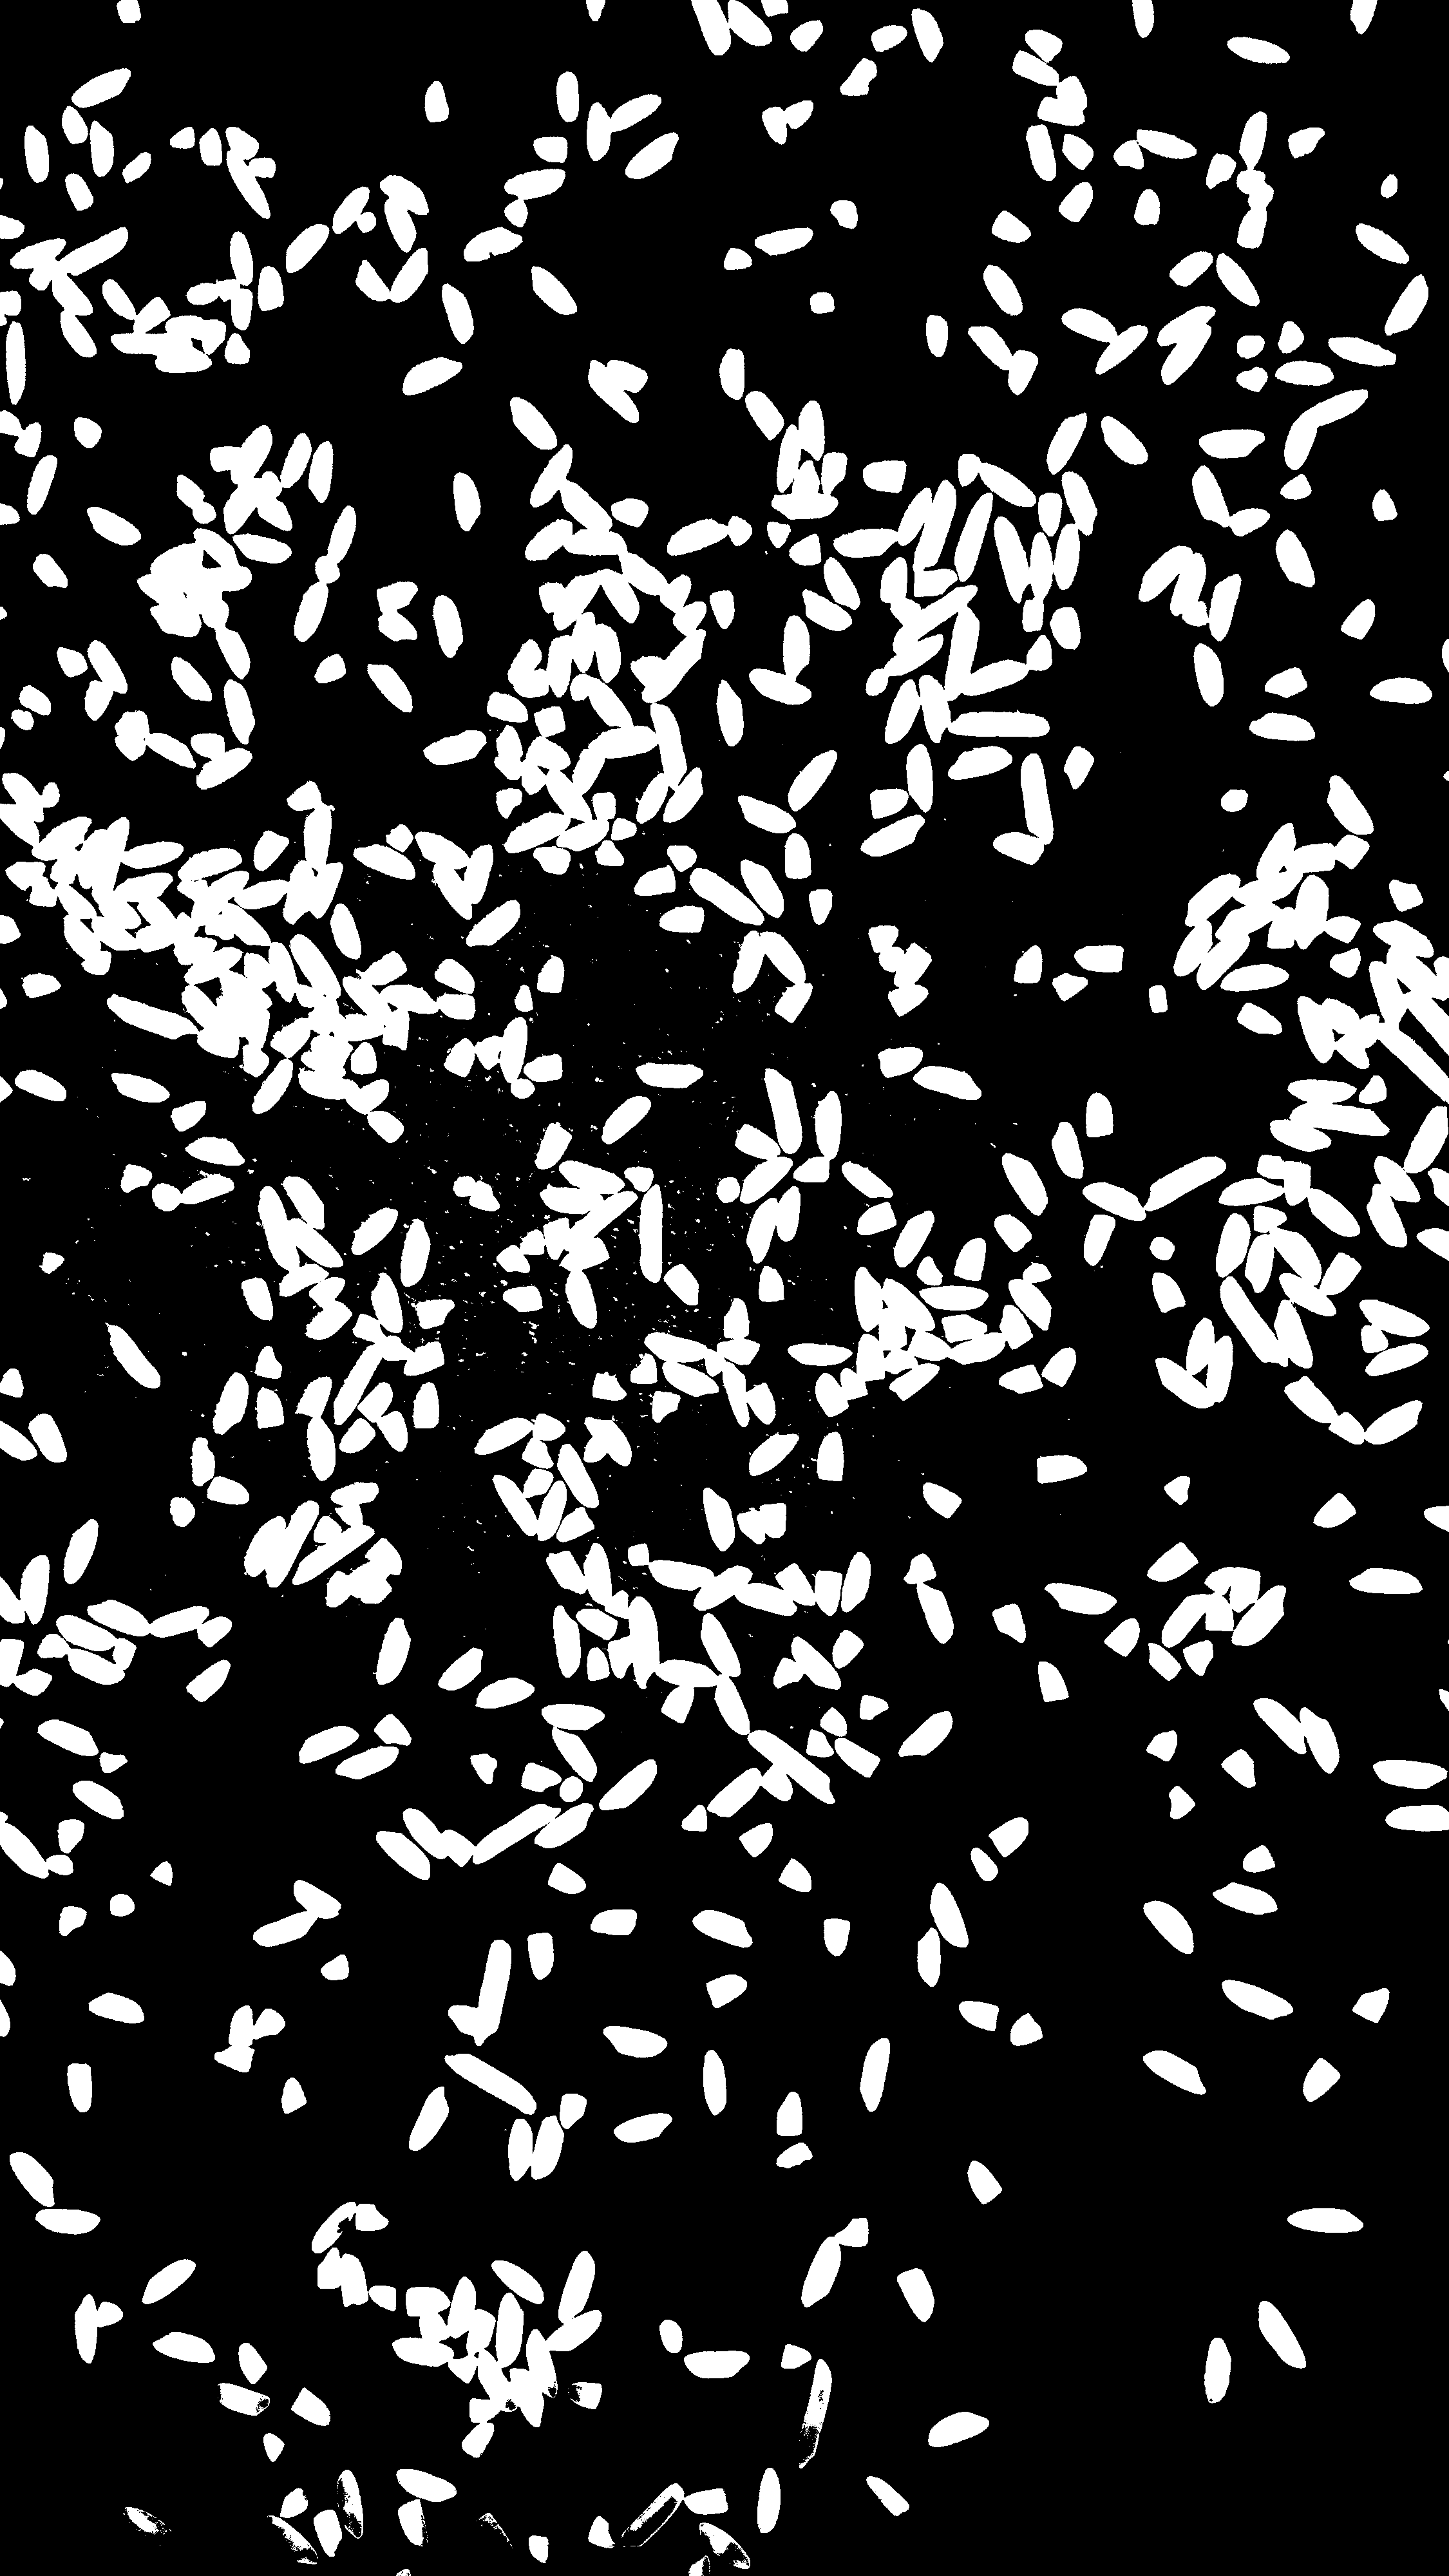

In [89]:
ret, thresh = cv.threshold(gray_img, 120, 255, cv.THRESH_BINARY)
cv2_imshow(thresh)

*  Noise Removal --> One method to remove noise is by convolving the original image with a mask that represents a low-pass filter or smoothing operation.

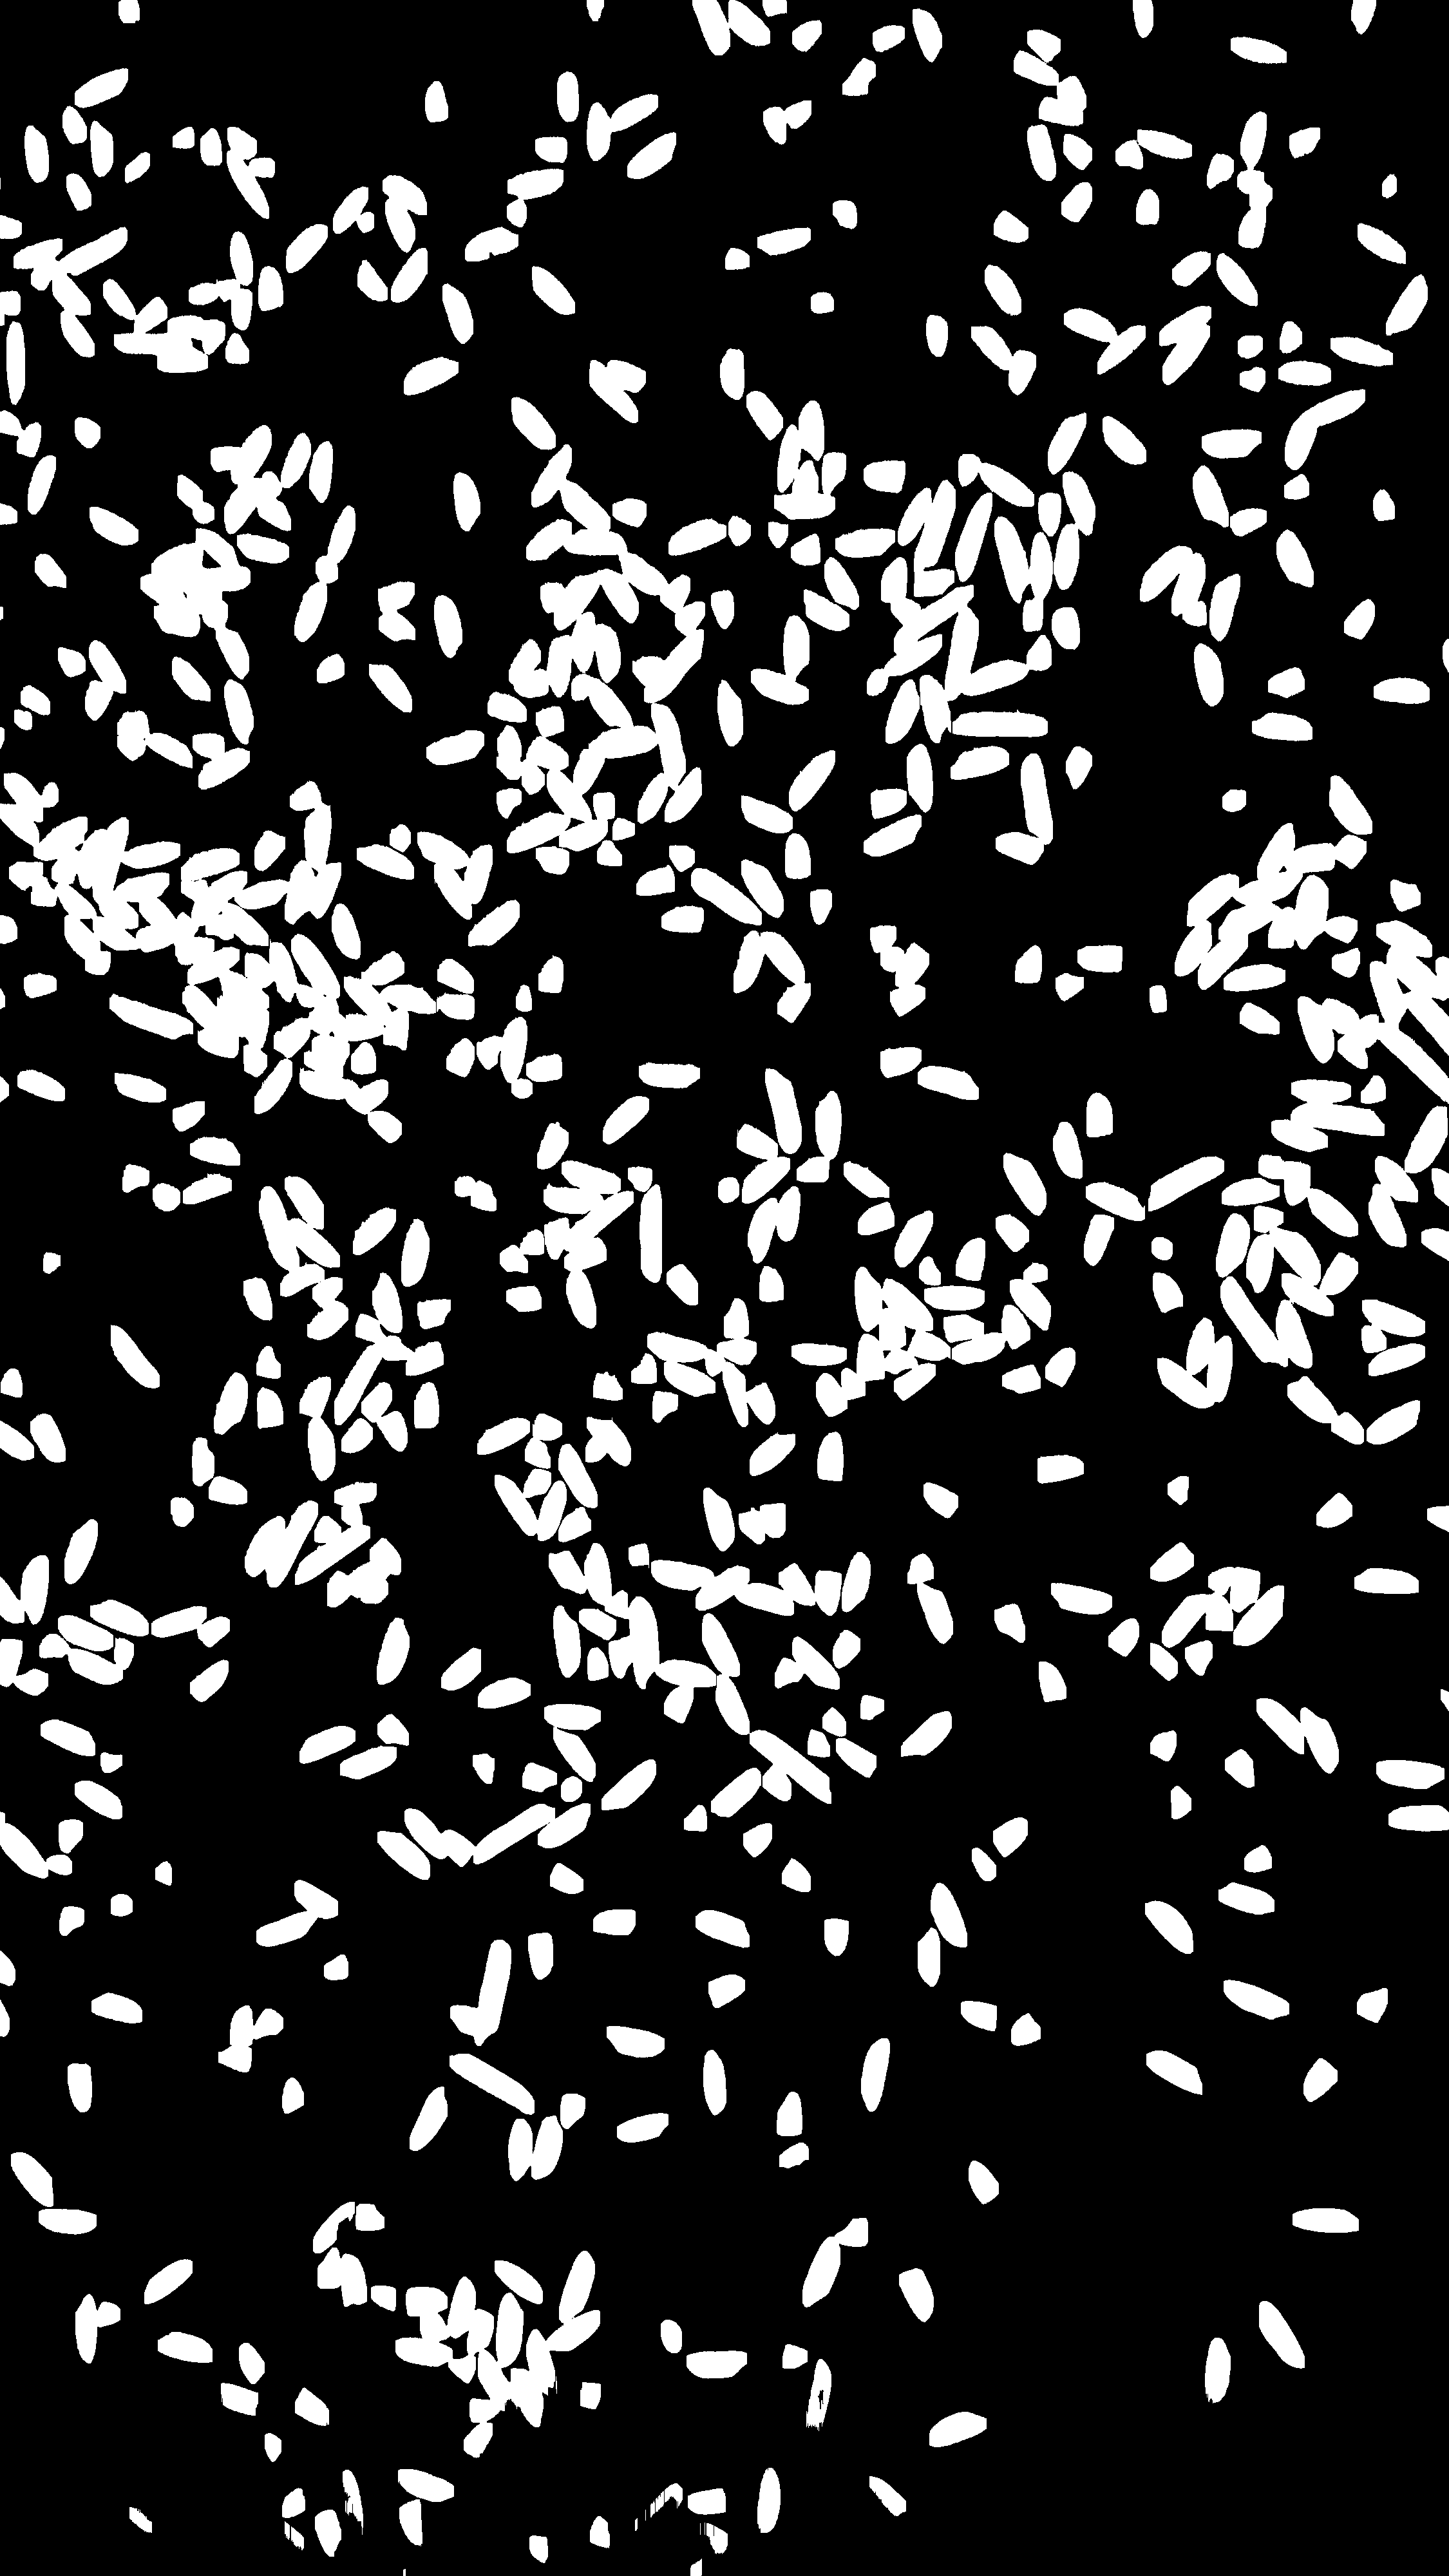

In [90]:
kernel = np.ones((3), np.uint8)
perfect_image = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=8)
cv2_imshow(perfect_image)

* Image Preprocessing is Done. Let's move on to the next step.

## 3. Identifying the number of labels

In [91]:
#Copying the preprocessed image as label_image
label_image = perfect_image.copy()

#Creating a label_count variable to the count the number of grains in the image
label_count = 0

#Shape function for getting height and width
rows, cols = label_image.shape

#Looping through the pixel of image using rows and column of image
for j in range(rows):
    for i in range(cols):
        pixel = label_image[j, i]

        #Here there is single channel with 2 pixel intensities, Either 0 or 255. 0 represent black portion, where 255 represent grains (White).
        #Counting the total number of pixel with intensity 255
        if 255 == pixel:
            label_count += 1

            ##Applying floodFill method of opencv which will help in filling the backgroud that will ultimately helps in couting the contoured grain easily
            cv.floodFill(label_image, None, (i, j), label_count)

*   To get grain of the contour, i'm using floodFill method from openCV

Number of foreground objects 639467


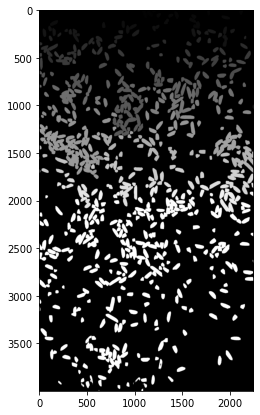

In [92]:
print("Number of foreground objects", label_count)
image_show(label_image)

## 4. Obtaining the number of rice grains using Contours

In [93]:
# To count the no of rice grains
contours, hierarchy = cv.findContours(perfect_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

new_contour = cv.cvtColor(perfect_image, cv.COLOR_GRAY2BGR)
cv.drawContours(new_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours : ", len(contours))

Number of detected contours :  504


*  The number of rice grains is obtained

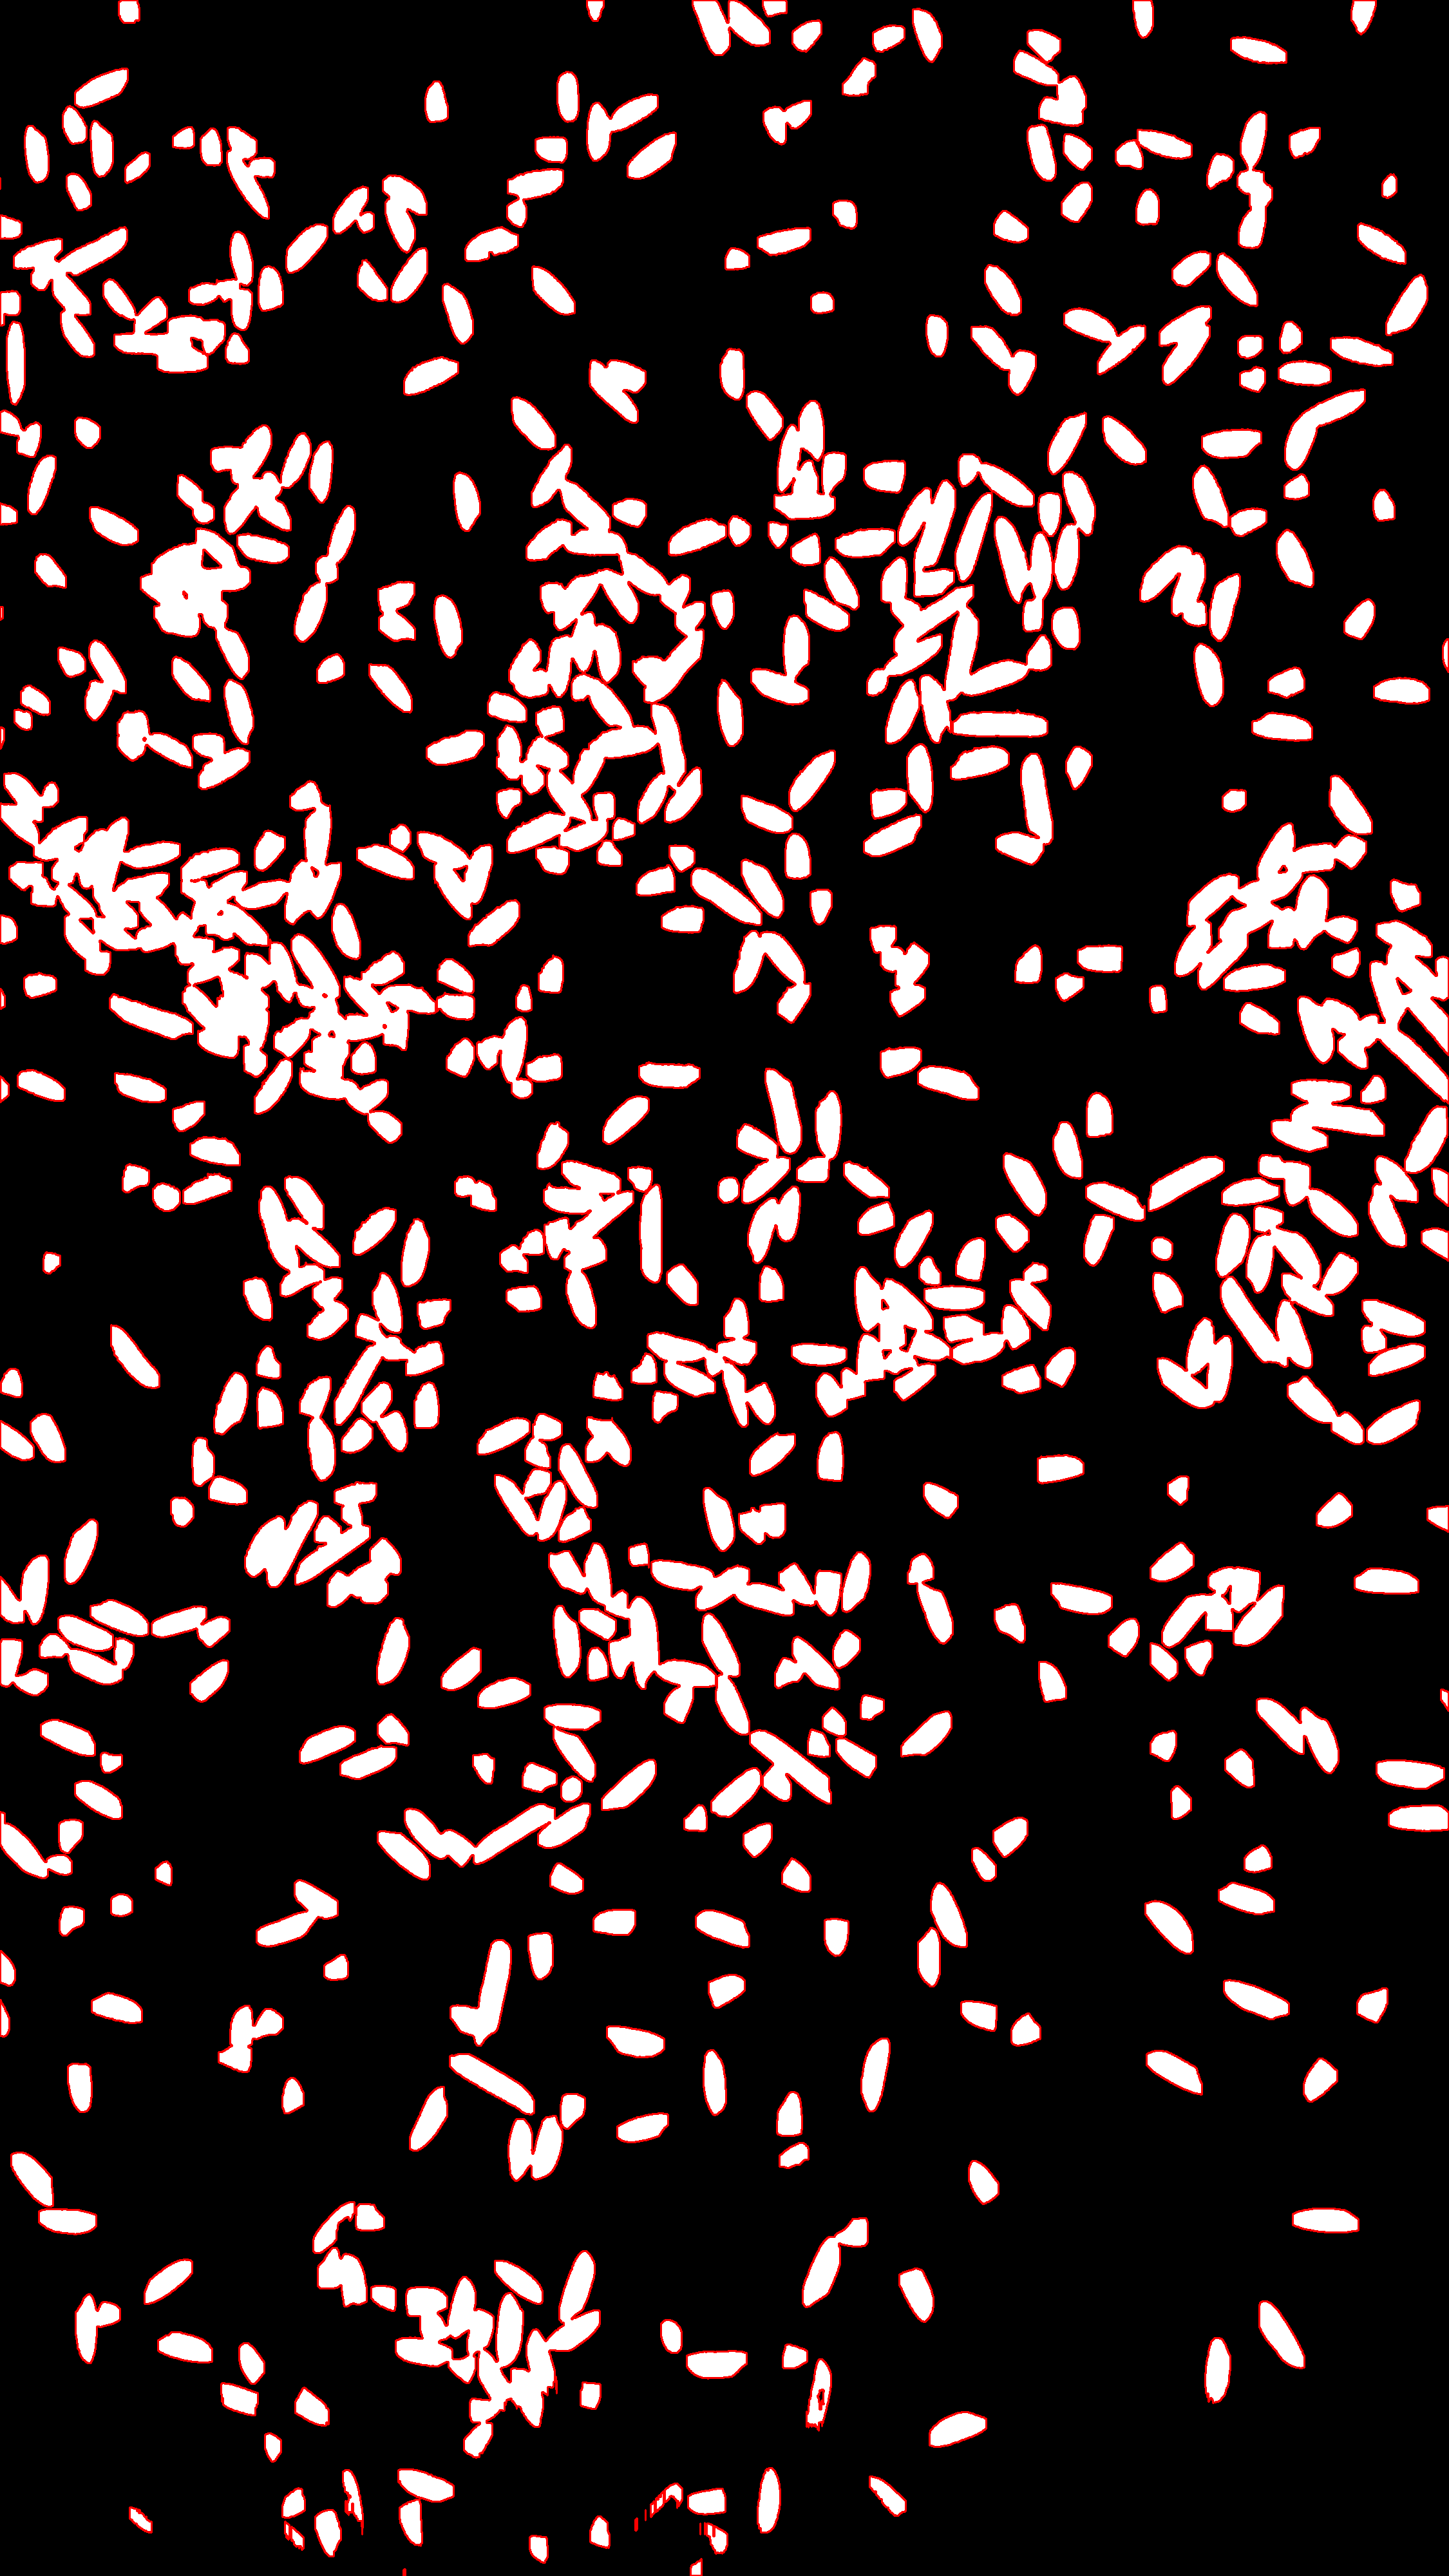

Number of detected contours :  504


In [94]:
cv2_imshow(new_contour)

print("Number of detected contours : ", len(contours))

*  Displaying the image after applaying the contour function.
*  The Number of grains present in the image --> 504

## Image Analysis

*   After applying contours, i may see a few rice grains that are touching one another in the output image.
*   Because of this situation, the OpenCV Contour method may treat those photos as a group or as a single grain of rice.

### It's time to resolve the contact rice grain issue

## 5. Watershed Algorithm

*   Watershed algorithm is based on extracting sure background and foreground and then using markers will make watershed run and detect the exact boundaries. 
*   This algorithm generally helps in detecting touching and overlapping objects in image.

In [95]:
# Applying distance transform edt to determine how far non-zero is from zero
distance = ndimage.distance_transform_edt(perfect_image)

local_max = feature.peak_local_max(distance, min_distance=23)

local_max_mask = np.zeros(distance.shape, dtype = bool)
local_max_mask[tuple(local_max.T)] = True

# Watershed algorithm
label = watershed(-distance, measure.label(local_max_mask), mask=perfect_image)

## 6. Counting the Number of Total and Broken Grains. 

#### Objective - 1

Number of Rice grains are : 704


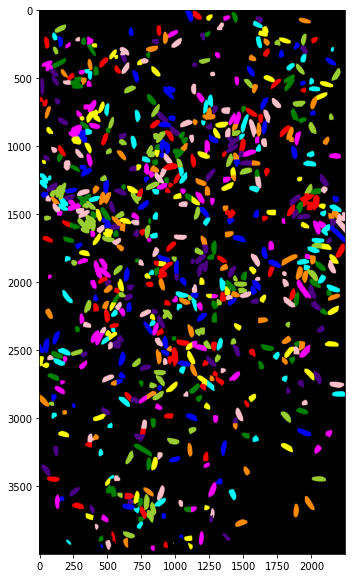

In [96]:
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(label, bg_label=0))
print("Number of Rice grains are : %d" % label.max())

## Results :

*  Now that the majority of the touching rice grains are well split, counting is more efficient.
*  The count of rice grain before applying Watershed algorithm --> 504
*  The count of rice grain after applying Watershed algorithm --> 704

#### Objective - 2

In [97]:
# Creating A list name count for counting the total Broken rice grains
label_count = []

# Iterating through contour 
for x in contours:

  # Using contourArea method
  area = cv.contourArea(x)
  if area < 800 :
    label_count.append(x)

# Output
print("Number of broken rice grain in the Image : ", len(label_count))

Number of broken rice grain in the Image :  70


## Results :
*   The count of broken rice grain after applying Watershed algorithm --> 70

## Alternate Approach

## Method 3 (Neural Network training) 
I haven’t applied this method as part of the solution, but this method can also be one of the ways to tackle the problem statement.

Training a neural network on a custom dataset having well annotated full rice grain and broken rice grains images.

It will give the optimal solution with very less error.
I haven’t applied this as I haven’t found any pre-trained model or dataset for the following. But this method can be taken further to take into consideration.